In [1]:
import importlib

from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]

%matplotlib inline
import tensorflow as tf

from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3, ForcedDiversityBootstrapThroughTime

# Linear

In [2]:
num_meta_epochs = 3#100#10
num_epochs = 10#50#15#50
seed = 4200
num_samples = 150

model_params = {'num_epochs':num_epochs,'seed':seed,'initialisation_scheme':tf.keras.initializers.he_normal}

dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10, 10,10]
num_neurons_nonlinear = [10,10,10,10,5]

activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,
                'num_epochs':num_epochs,'seed':seed}

experiment started at 2018-08-08 23:57:16.751348
experiment number 1 took 16.648280143737793 seconds. That means the whole run will probably take 49.94484043121338 more seconds and 0.8324140071868896 more minutes.
overall, it took 53.30254578590393 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   2.784909e-09  0.237037  1.684163  0.008008
std    3.030138e-09  0.051320  0.069872  0.000628
min    1.026548e-15  0.177778  1.642960  0.007609
25%    1.171492e-09  0.222222  1.643826  0.007647
50%    2.342983e-09  0.266667  1.644692  0.007684
75%    4.177364e-09  0.266667  1.704765  0.008208
max    6.011744e-09  0.266667  1.764838  0.008732
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  2.784909e-09 &  0.237037 &  1.684163 &  0.008008 \\
std   &  3.030138e-09 &  0.051320 &  0.069872 &  0.00

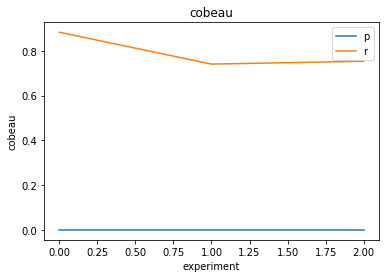

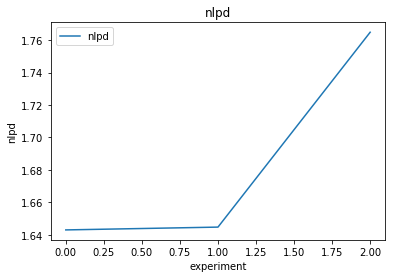

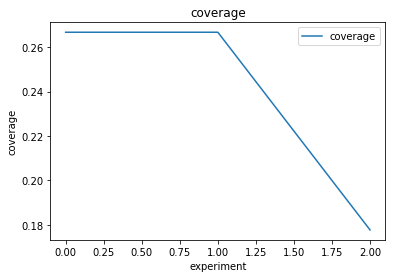

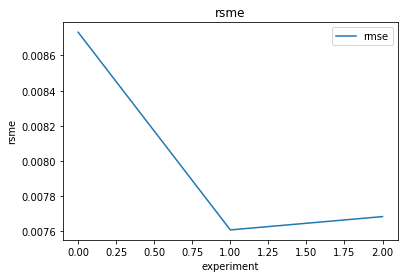

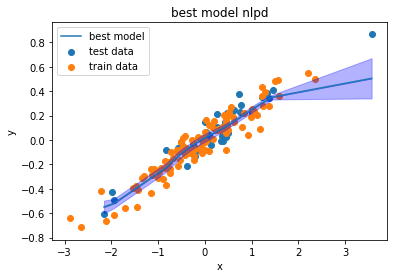

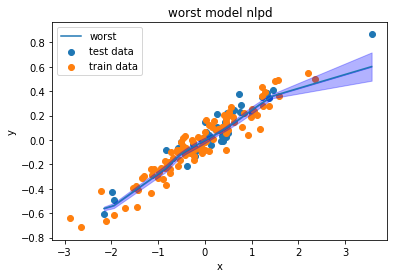

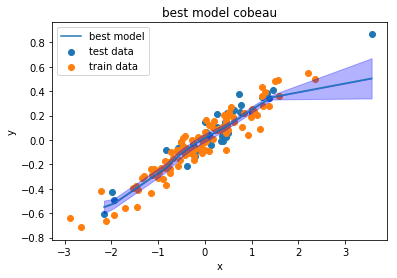

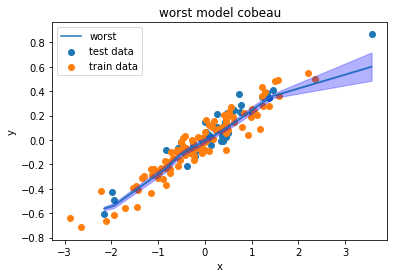

In [3]:
pd = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-08 23:58:14.734920
experiment number 1 took 34.28137278556824 seconds. That means the whole run will probably take 102.84411835670471 more seconds and 1.714068639278412 more minutes.
overall, it took 103.35975980758667 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   1.744650e-04  0.918519  0.439479  0.083156
std    2.556015e-04  0.105018  0.340052  0.073688
min    7.971924e-07  0.800000  0.065136  0.035141
25%    2.771392e-05  0.877778  0.294572  0.040735
50%    5.463065e-05  0.955556  0.524008  0.046329
75%    2.612989e-04  0.977778  0.626650  0.107164
max    4.679671e-04  1.000000  0.729293  0.167999
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  1.744650e-04 &  0.918519 &  0.439479 &  0.083156 \\
std   &  2.556015e-04 &  0.105018 &  0.340052 &  0.07

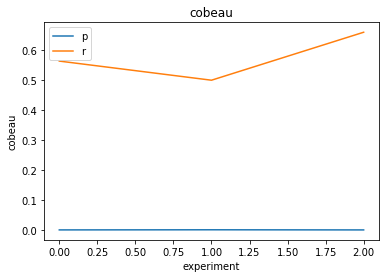

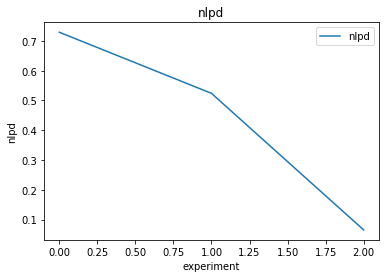

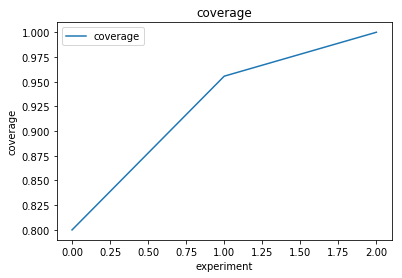

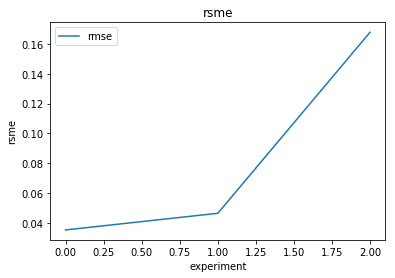

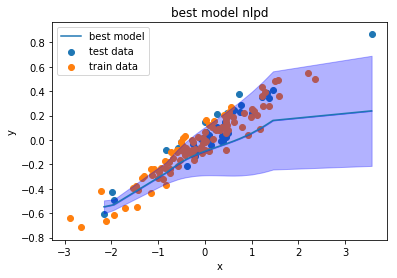

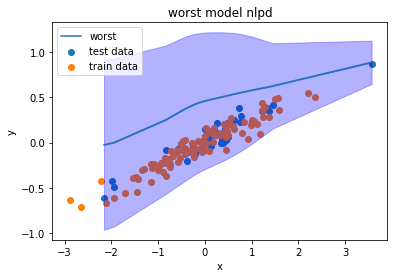

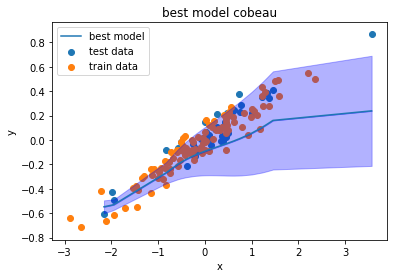

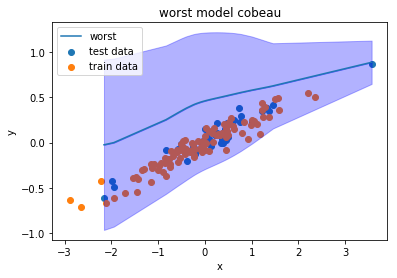

In [4]:
pd1 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 00:00:04.897304
experiment number 1 took 42.67298078536987 seconds. That means the whole run will probably take 128.01894235610962 more seconds and 2.1336490392684935 more minutes.
overall, it took 120.3801920413971 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.084501  0.955556  0.487375  0.008073
std    0.042603  0.038490  0.253144  0.001302
min    0.045875  0.933333  0.243825  0.006629
25%    0.061654  0.933333  0.356497  0.007529
50%    0.077432  0.933333  0.469169  0.008430
75%    0.103814  0.966667  0.609150  0.008794
max    0.130196  1.000000  0.749130  0.009159
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.084501 &  0.955556 &  0.487375 &  0.008073 \\
std   &  0.042603 &  0.038490 &  0.253144 &  0.001302 \\
min   &  0.045875 &  0.933333 &  0.243825 & 

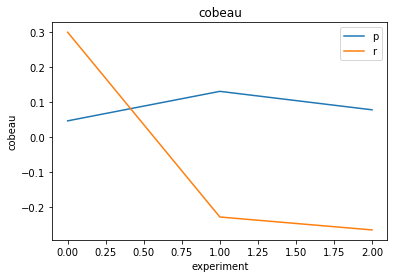

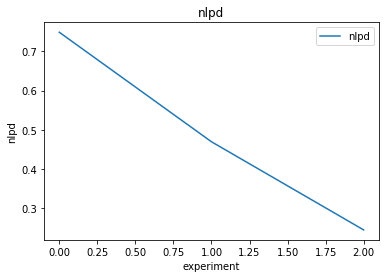

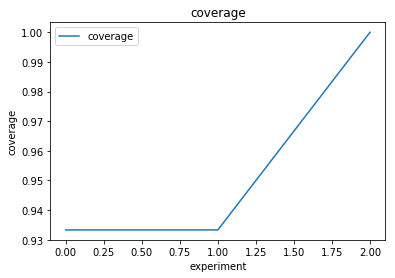

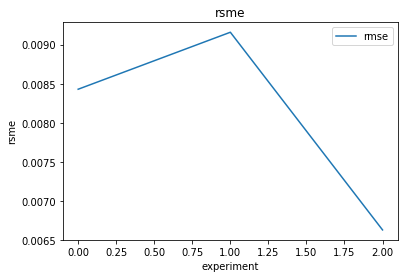

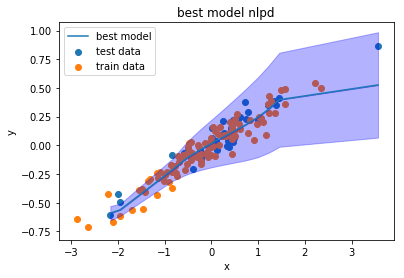

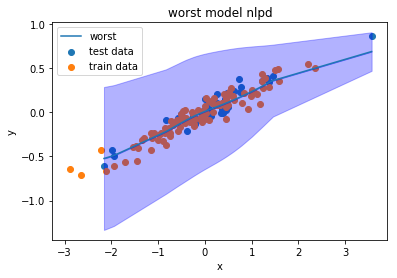

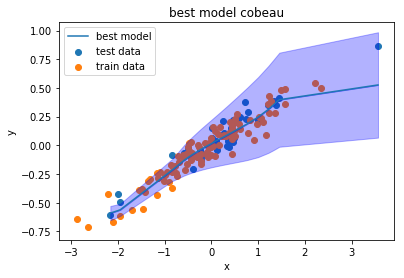

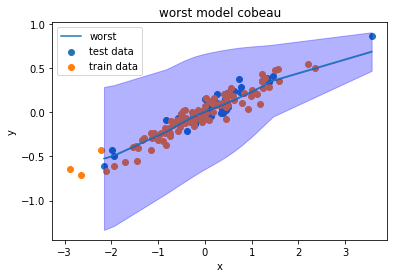

In [5]:
pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

# Nonlinear


In [6]:
#num_meta_epochs = 3#10
#num_epochs = 5#50
seed = 42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}

dataset_params = {'num_samples':num_samples,'seed':seed}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-09 00:02:10.501250
experiment number 1 took 31.163755178451538 seconds. That means the whole run will probably take 93.49126553535461 more seconds and 1.558187758922577 more minutes.
overall, it took 71.44116997718811 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.001079  0.511111  0.731069  0.059126
std    0.001856  0.076980  0.059179  0.001109
min    0.000005  0.422222  0.695918  0.057915
25%    0.000008  0.488889  0.696907  0.058643
50%    0.000011  0.555556  0.697896  0.059371
75%    0.001617  0.555556  0.748644  0.059731
max    0.003222  0.555556  0.799393  0.060091
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.001079 &  0.511111 &  0.731069 &  0.059126 \\
std   &  0.001856 &  0.076980 &  0.059179 &  0.001109 \\
min   &  0.000005 &  0.422222 &  0.695918 &  

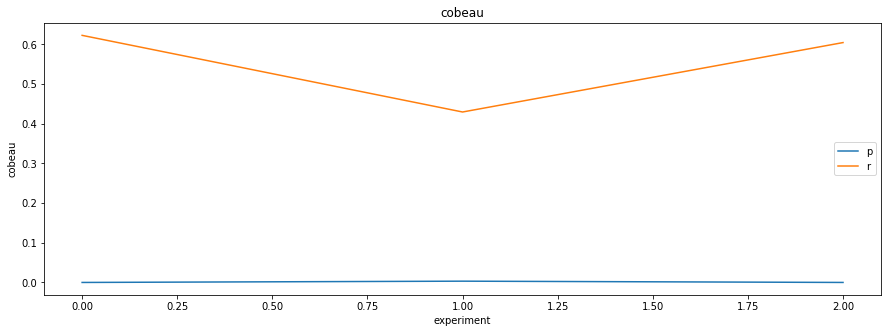

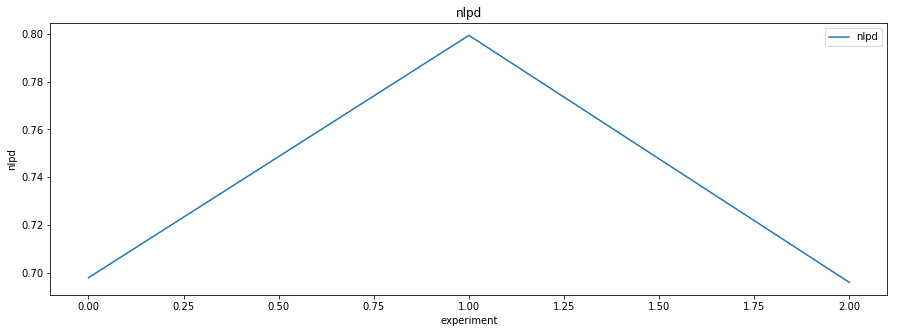

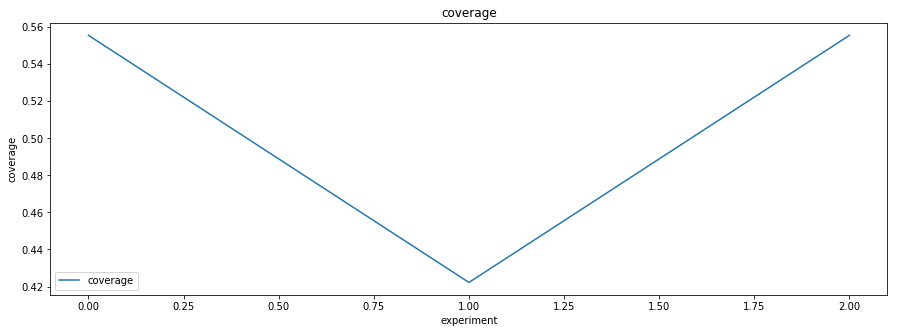

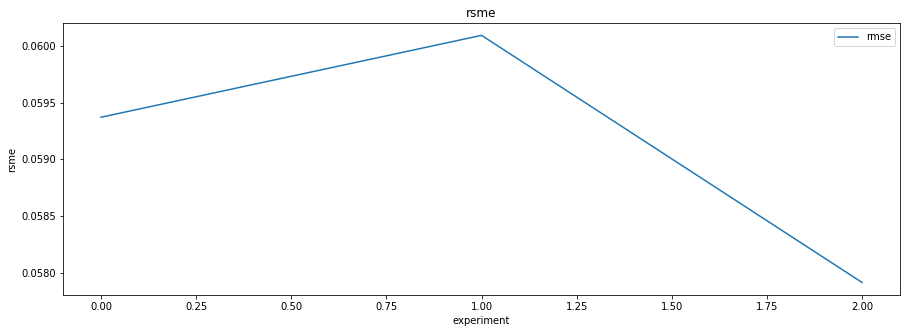

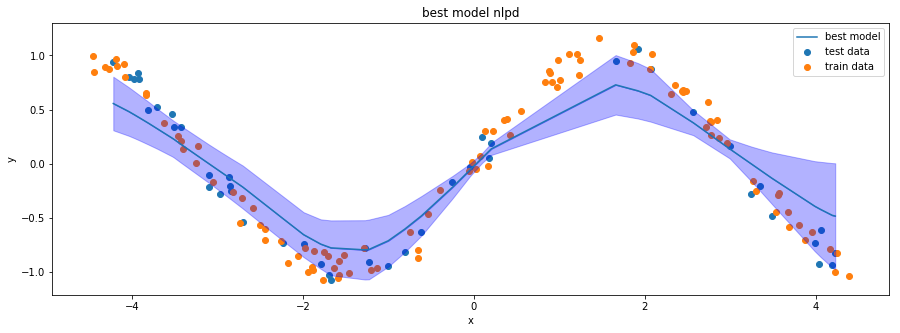

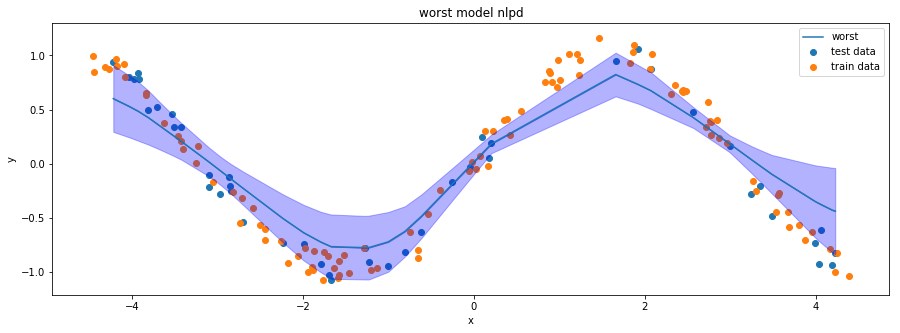

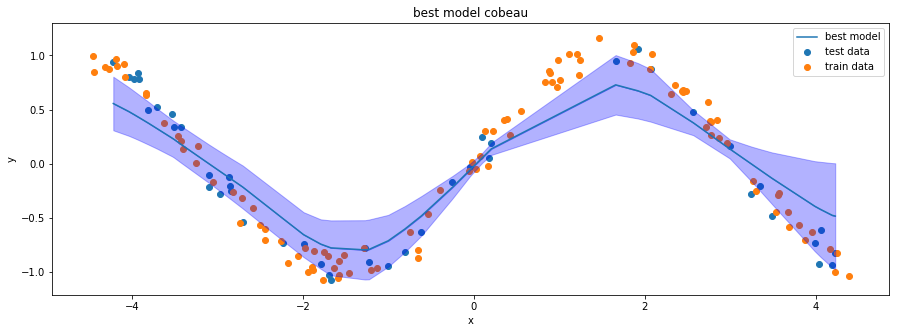

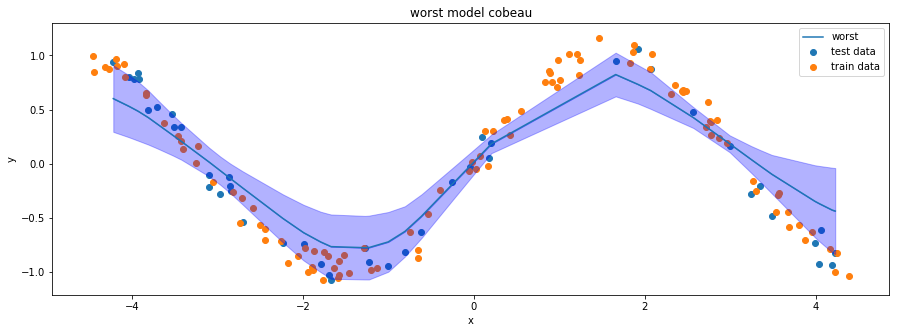

In [7]:
pd11 = repeat_experiment(BootstrapEnsemble, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 00:03:26.253108
experiment number 1 took 42.39052224159241 seconds. That means the whole run will probably take 127.17156672477722 more seconds and 2.1195261120796203 more minutes.
overall, it took 118.33328580856323 seconds with 3 experiments
             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   4.555210e-10  0.800000  0.224871  0.373810
std    7.229615e-10  0.240370  0.714665  0.523718
min    2.363912e-12  0.533333 -0.600206  0.050810
25%    3.864489e-11  0.700000  0.011865  0.071682
50%    7.492587e-11  0.866667  0.623936  0.092553
75%    6.820995e-10  0.933333  0.637410  0.535310
max    1.289273e-09  1.000000  0.650883  0.978067
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  4.555210e-10 &  0.800000 &  0.224871 &  0.373810 \\
std   &  7.229615e-10 &  0.240370 &  0.714665 &  0.5

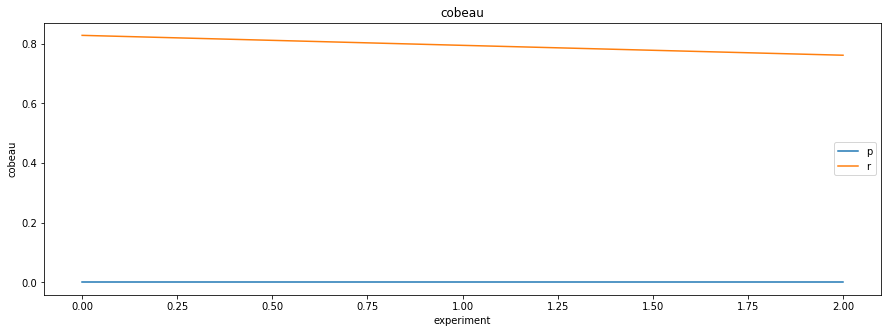

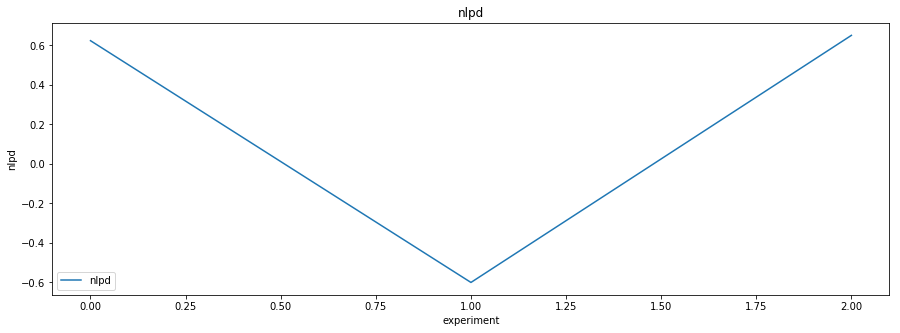

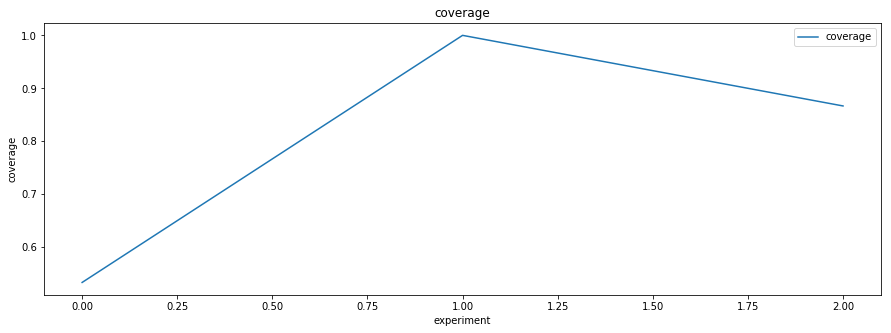

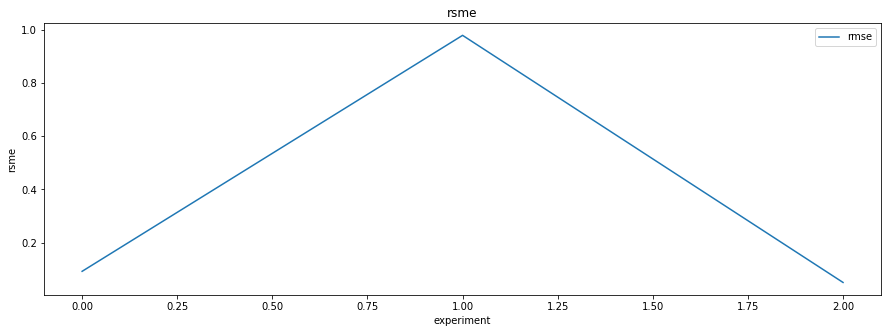

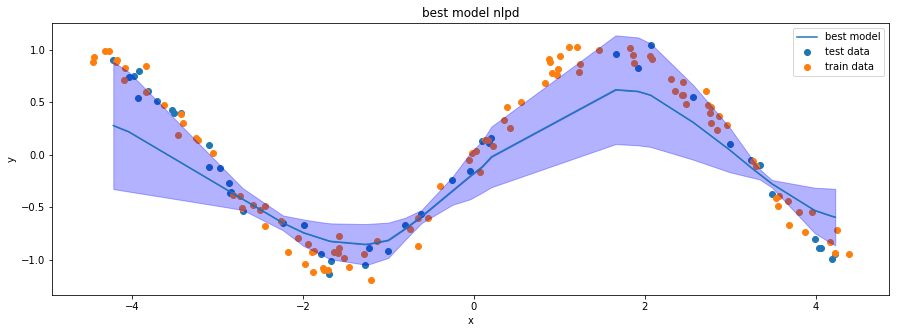

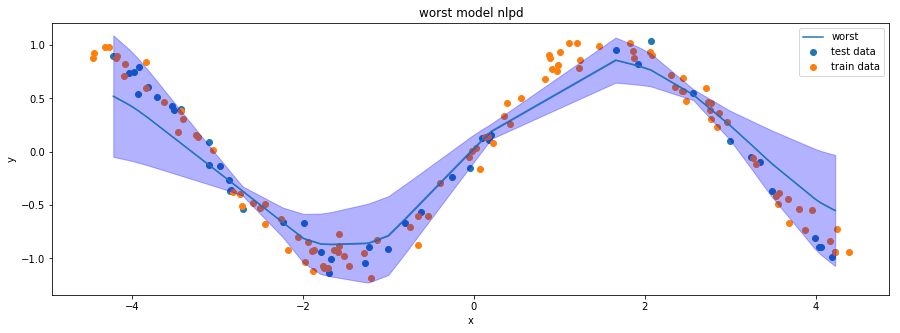

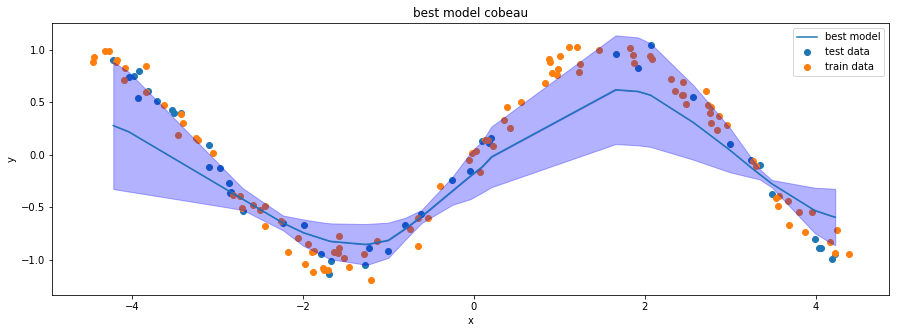

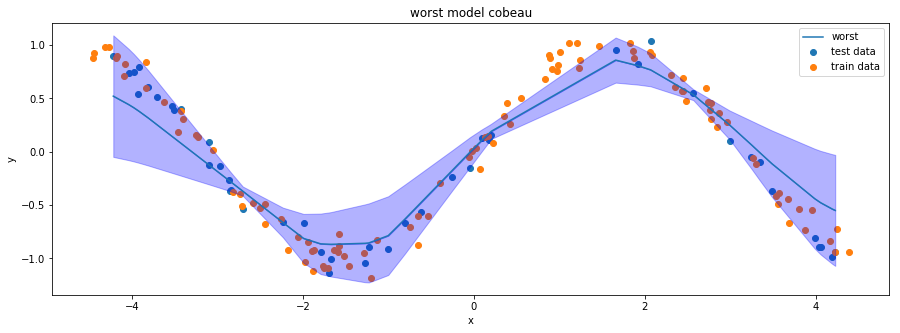

In [8]:
pd22 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-09 00:05:28.996639
experiment number 1 took 31.932259798049927 seconds. That means the whole run will probably take 95.79677939414978 more seconds and 1.5966129899024963 more minutes.
overall, it took 96.09307408332825 seconds with 3 experiments
         cobeau  coverage      nlpd      rsme
count  3.000000  3.000000  3.000000  3.000000
mean   0.482560  0.888889  0.370975  0.013618
std    0.286853  0.101835  0.647414  0.003458
min    0.216792  0.800000 -0.376539  0.010581
25%    0.330517  0.833333  0.180150  0.011736
50%    0.444241  0.866667  0.736840  0.012891
75%    0.615444  0.933333  0.744732  0.015136
max    0.786647  1.000000  0.752624  0.017381
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  0.482560 &  0.888889 &  0.370975 &  0.013618 \\
std   &  0.286853 &  0.101835 &  0.647414 &  0.003458 \\
min   &  0.216792 &  0.800000 & -0.376539 & 

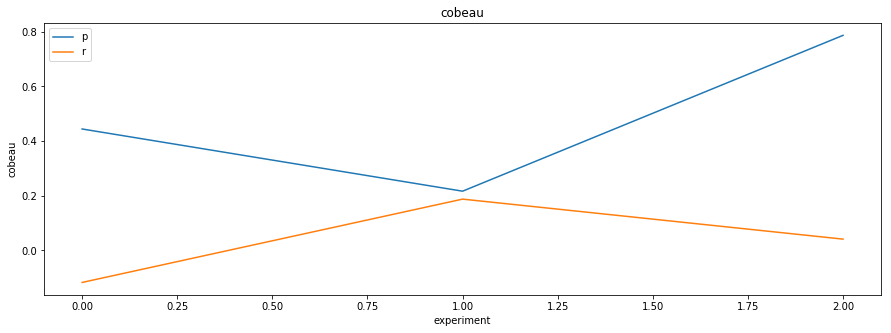

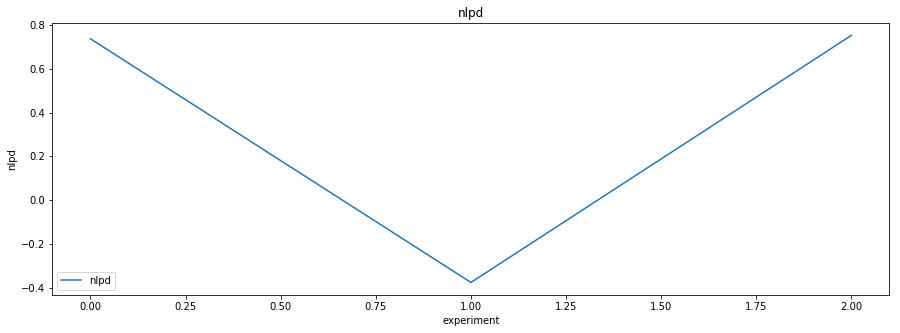

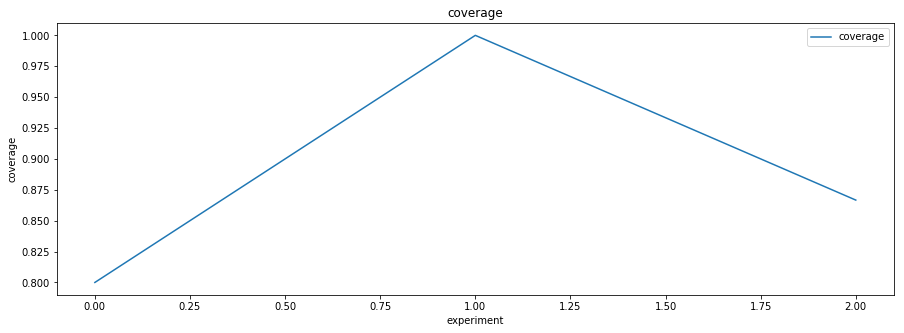

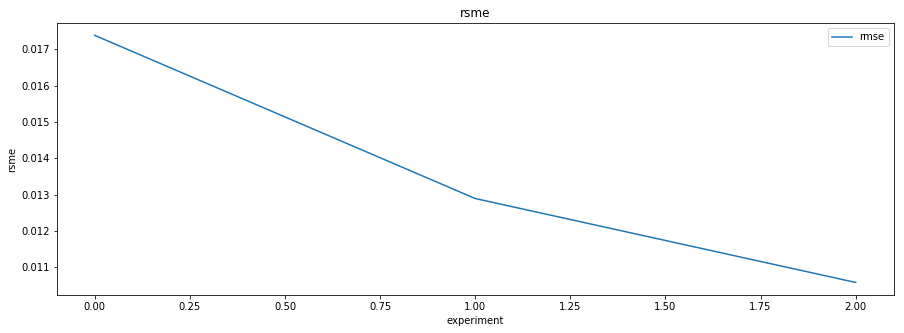

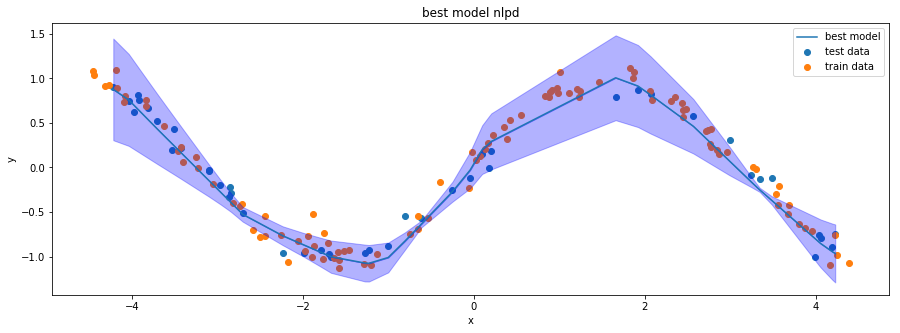

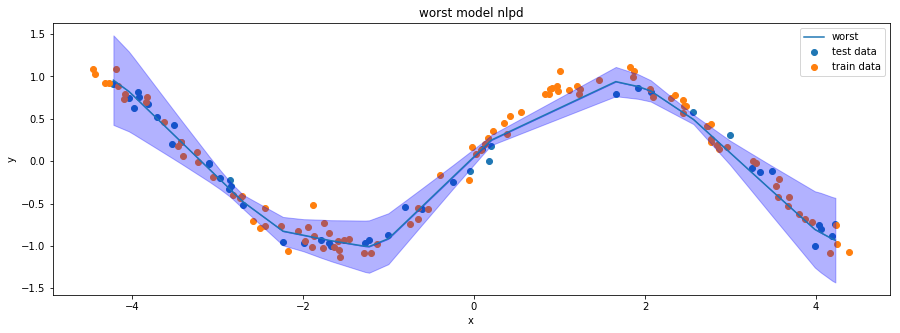

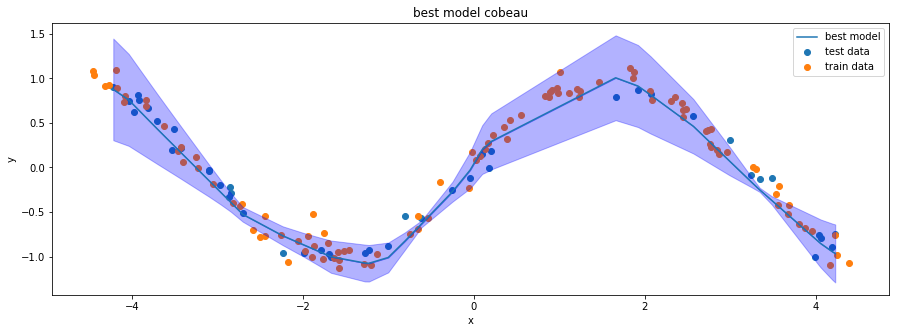

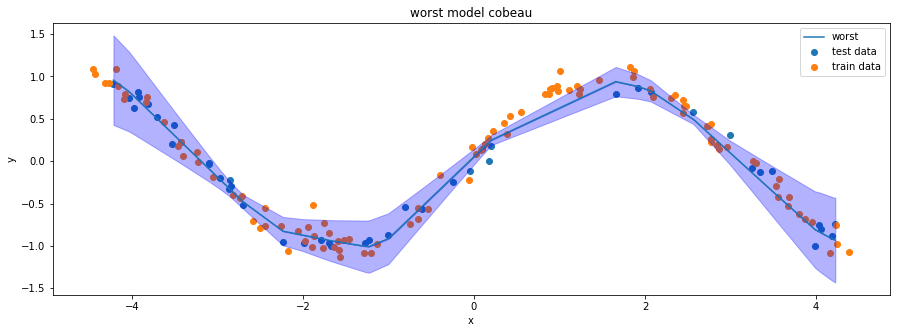

In [9]:
pd33 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

# X3

In [10]:
dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-09 00:07:09.411488
experiment number 1 took 18.941615104675293 seconds. That means the whole run will probably take 56.82484531402588 more seconds and 0.9470807552337647 more minutes.
overall, it took 55.229153871536255 seconds with 3 experiments
             cobeau  coverage      nlpd       rsme
count  3.000000e+00  3.000000  3.000000   3.000000
mean   2.631058e-04  0.525926 -4.985362  50.794193
std    4.532893e-04  0.012830  0.157462   0.909357
min    7.846495e-07  0.511111 -5.124851  49.791812
25%    1.399371e-06  0.522222 -5.070735  50.408178
50%    2.014092e-06  0.533333 -5.016620  51.024544
75%    3.942665e-04  0.533333 -4.915618  51.295383
max    7.865188e-04  0.533333 -4.814616  51.566223
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &       rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &   3.000000 \\
mean  &  2.631058e-04 &  0.525926 & -4.985362 &  50.794193 \\
std   &  4.532893e-04 &  0.012830 &  0.1

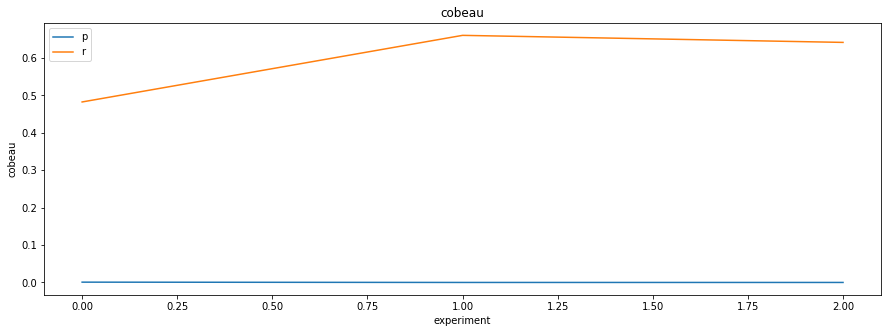

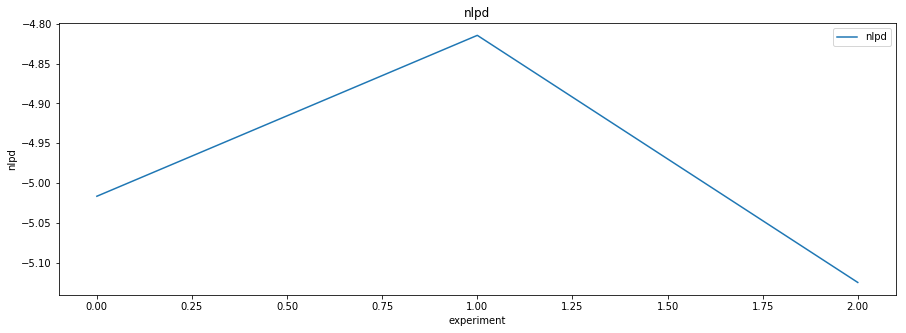

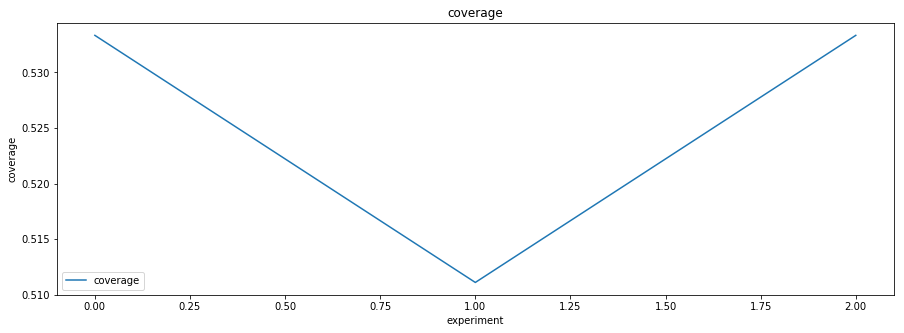

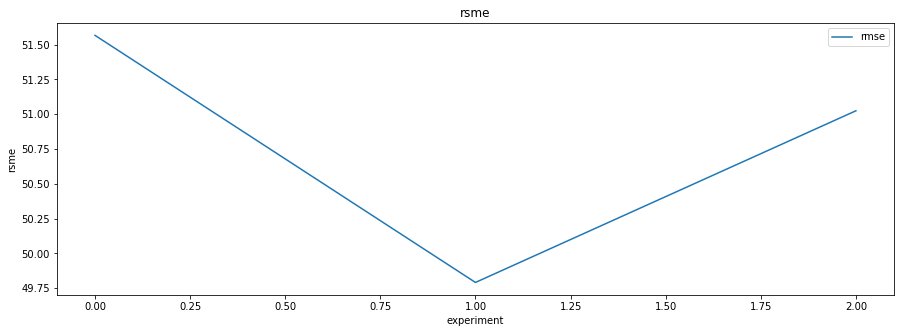

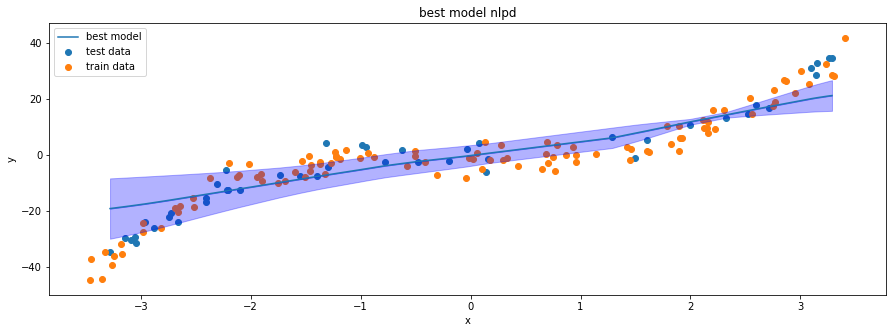

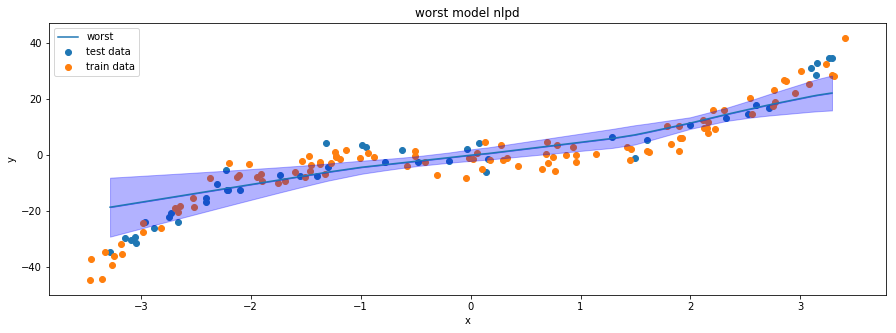

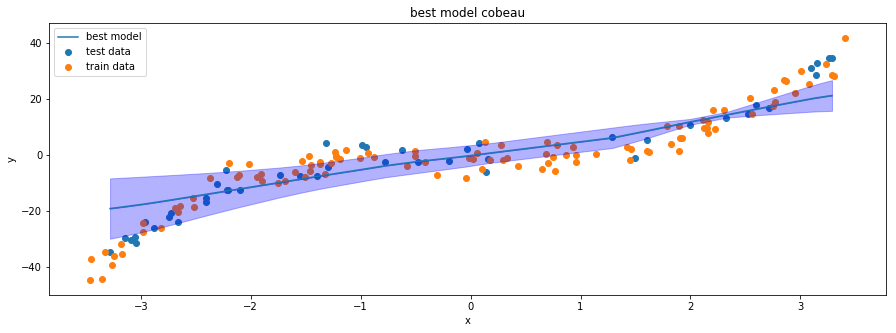

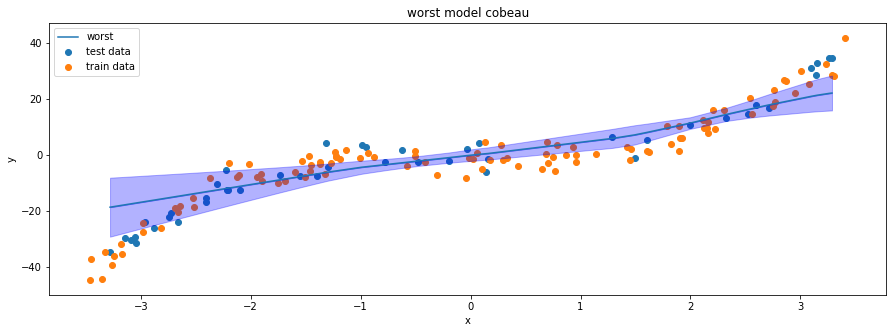

In [11]:
pd111 = repeat_experiment(BootstrapEnsemble, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-09 00:08:09.026024
experiment number 1 took 34.43105101585388 seconds. That means the whole run will probably take 103.29315304756165 more seconds and 1.721552550792694 more minutes.
overall, it took 108.91820979118347 seconds with 3 experiments
         cobeau  coverage      nlpd       rsme
count  3.000000  3.000000  3.000000   3.000000
mean   0.000218  0.711111 -3.064571  27.371070
std    0.000268  0.076980  0.290892   8.296549
min    0.000026  0.666667 -3.348634  22.320115
25%    0.000065  0.666667 -3.213206  22.583469
50%    0.000104  0.666667 -3.077778  22.846822
75%    0.000314  0.733333 -2.922539  29.896547
max    0.000525  0.800000 -2.767301  36.946271
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &       rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &   3.000000 \\
mean  &  0.000218 &  0.711111 & -3.064571 &  27.371070 \\
std   &  0.000268 &  0.076980 &  0.290892 &   8.296549 \\
min   &  0.000026 &  0.666667 &

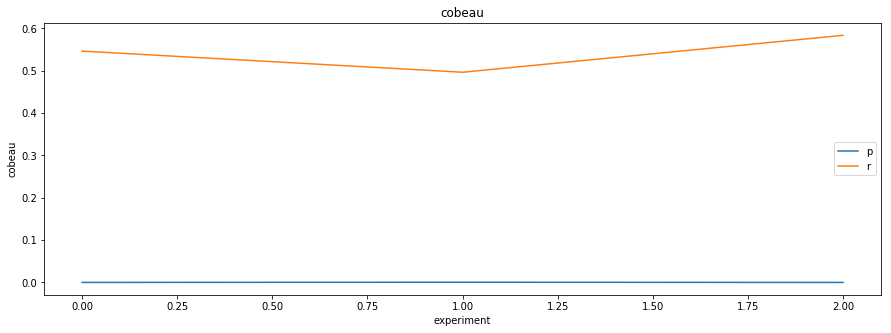

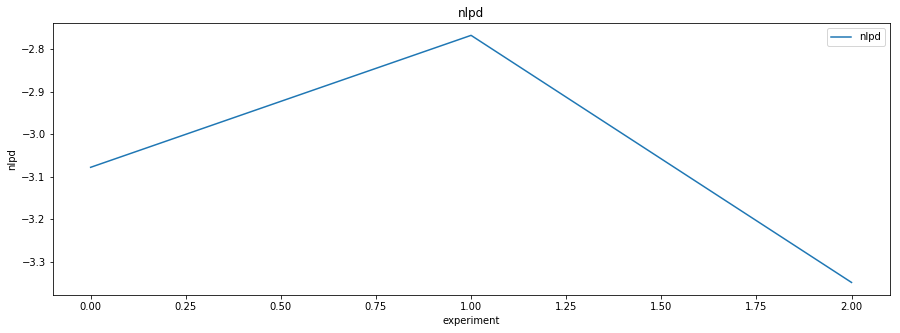

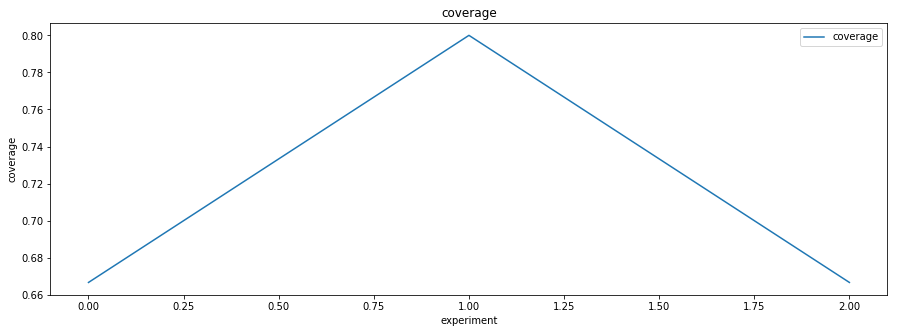

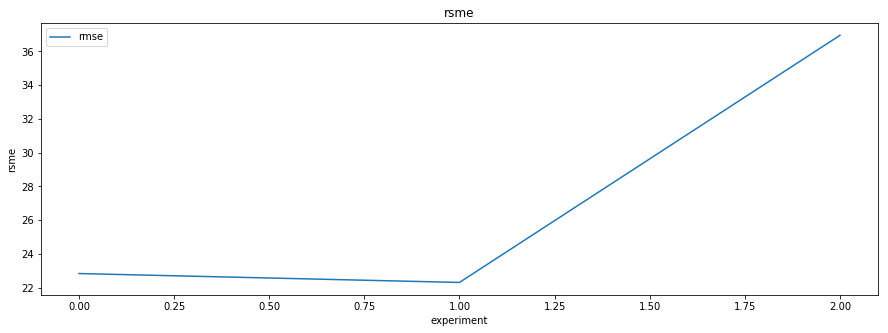

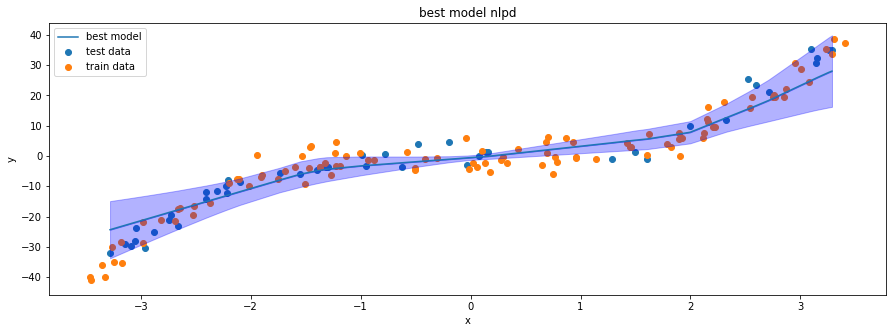

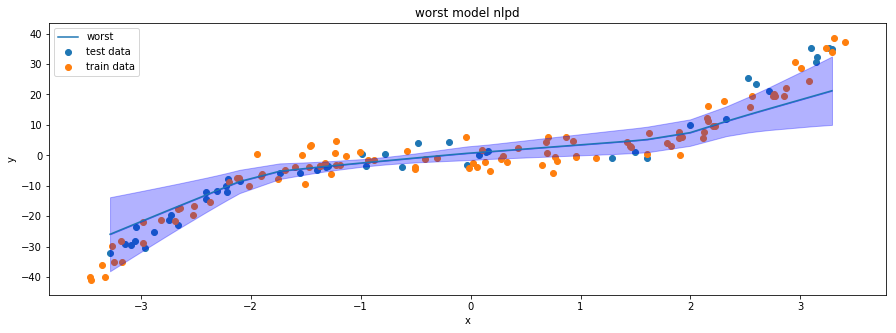

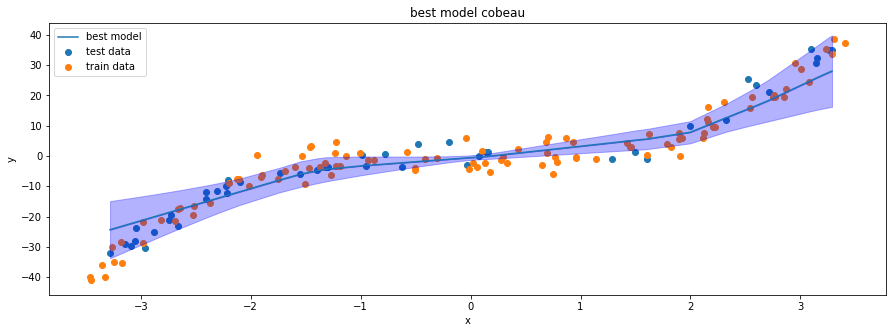

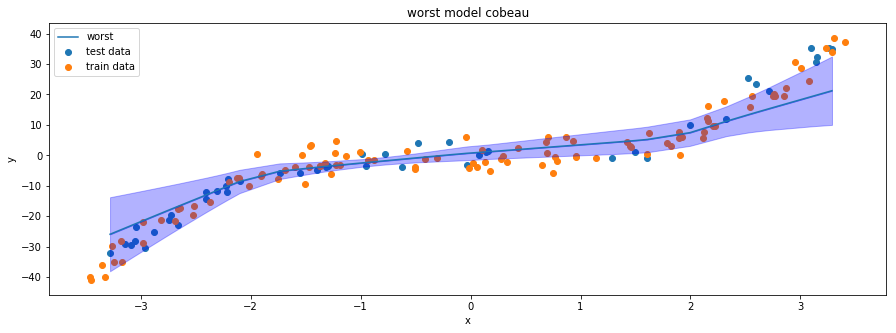

In [12]:
pd222 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-09 00:10:02.298441
experiment number 1 took 31.321672201156616 seconds. That means the whole run will probably take 93.96501660346985 more seconds and 1.5660836100578308 more minutes.
overall, it took 94.54639291763306 seconds with 3 experiments
         cobeau  coverage      nlpd       rsme
count  3.000000  3.000000  3.000000   3.000000
mean   0.778914  0.792593 -2.423382  10.364275
std    0.231516  0.111849  0.505193   0.775393
min    0.524913  0.688889 -2.970370   9.476760
25%    0.679315  0.733333 -2.647912  10.091227
50%    0.833717  0.777778 -2.325453  10.705695
75%    0.905914  0.844444 -2.149888  10.808032
max    0.978112  0.911111 -1.974323  10.910369
\begin{tabular}{lrrrr}
\toprule
{} &    cobeau &  coverage &      nlpd &       rsme \\
\midrule
count &  3.000000 &  3.000000 &  3.000000 &   3.000000 \\
mean  &  0.778914 &  0.792593 & -2.423382 &  10.364275 \\
std   &  0.231516 &  0.111849 &  0.505193 &   0.775393 \\
min   &  0.524913 &  0.688889 &

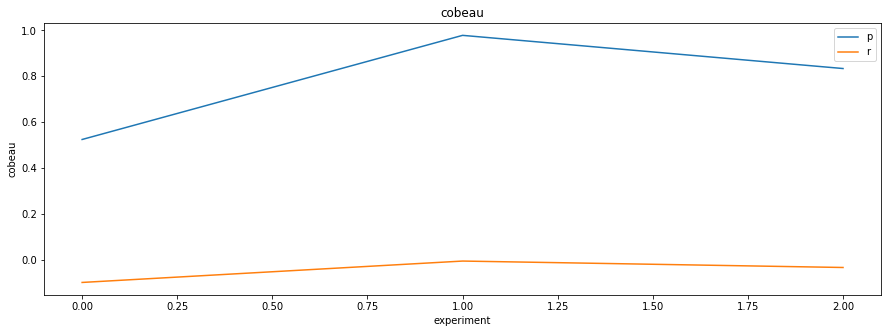

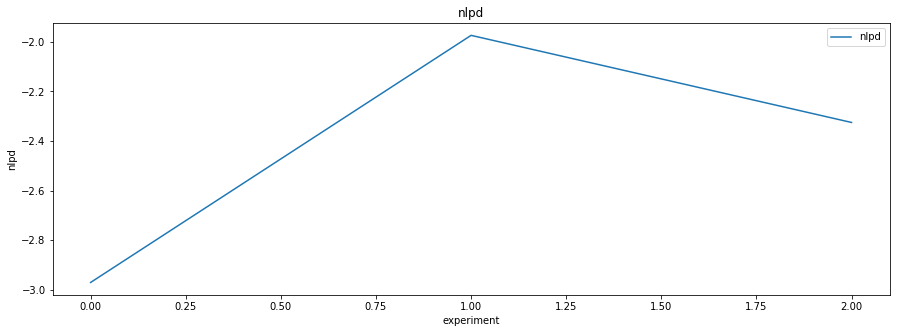

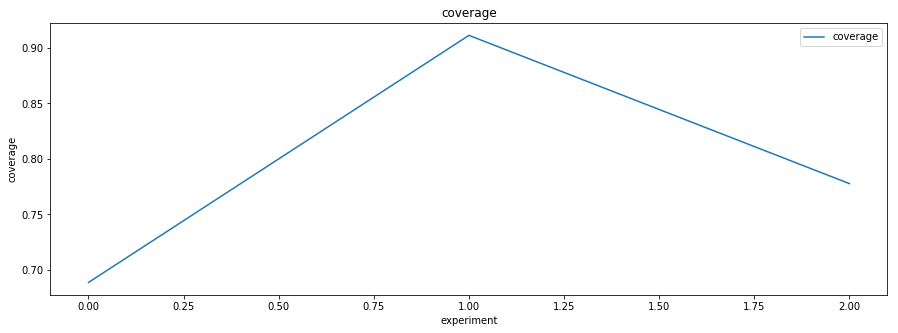

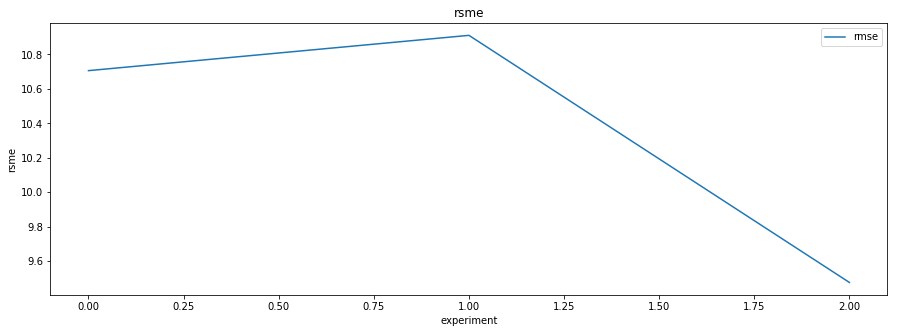

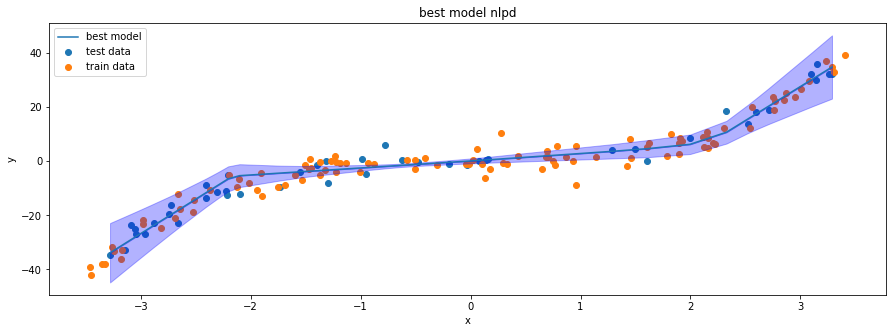

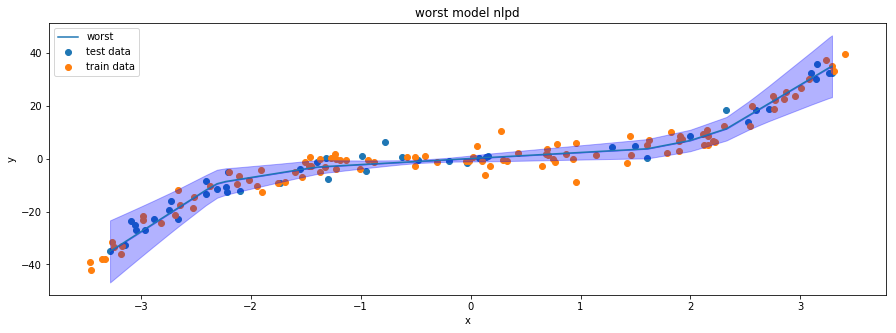

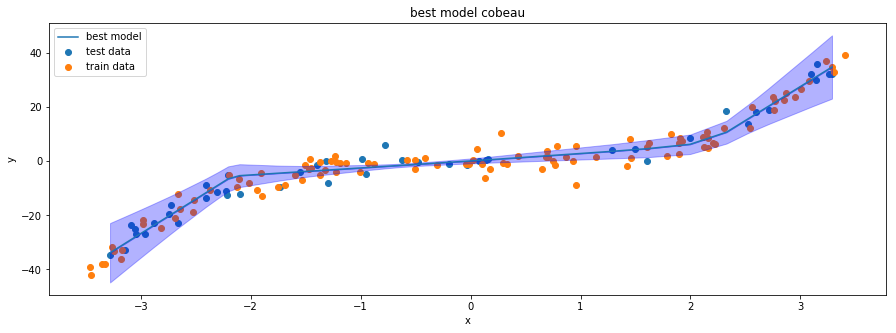

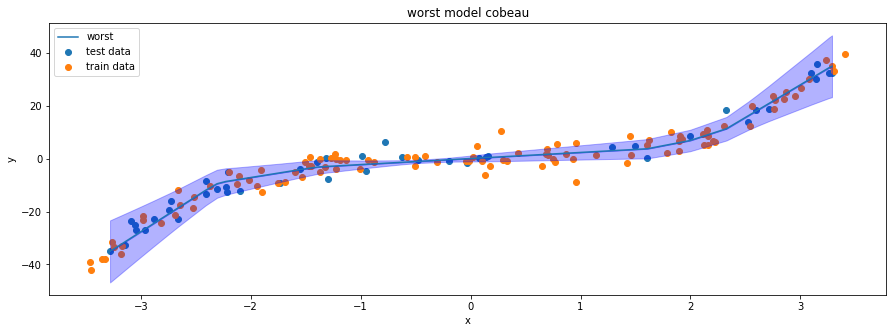

In [13]:
pd333 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)